In [290]:
from main import get_stock_data, add_fin_ratios_and_commodities
import matplotlib.pyplot as plt
import numpy as np
data = get_stock_data('CS.PA', lookback = '5y')
data = add_fin_ratios_and_commodities(data)
data = data.backfill()
data.tail()

/Users/louisdelacour/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,Volume,Returns,Log Returns,Gold Close,WTI Oil Close,5Y TY ^FVX,CAC 40,CAC Returns
date,,,,,,,,,,,,
2022-11-24,27.209999,27.600000,27.180000,27.275000,3727765,0.005345,0.005330,1753.300049,76.279999,3.870,6707.319824,0.004227
2022-11-25,27.360001,27.424999,27.139999,27.270000,3001066,-0.000183,-0.000183,1753.300049,76.279999,3.870,6712.479980,0.000769
2022-11-28,27.049999,27.285000,26.924999,27.100000,4321422,-0.006234,-0.006253,1740.099976,77.239998,3.896,6665.200195,-0.007044
2022-11-29,27.100000,27.475000,26.980000,27.355000,3606009,0.009410,0.009366,1748.400024,78.199997,3.920,6668.970215,0.000566
2022-12-02,27.139999,27.280001,27.045000,27.254999,1828954,-0.003656,-0.003662,1797.599976,81.739998,3.771,6728.950195,0.008994


In [291]:
# Install libraries
!pip install yfinance prophet
# Get time series data
import yfinance as yf
# Prophet model for time series forecast
from prophet import Prophet
# Data processing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [292]:
# Data start date
start_date = '2020-01-02'
# Data end date. yfinance excludes the end date, so we need to add one day to the last day of data
end_date = '2022-01-01' 
# Date for splitting training and testing dataset
train_end_date = '2021-12-15'

In [293]:
data.drop('High', inplace=True, axis=1)
data.drop('Low', inplace=True, axis=1)
data.drop('Close', inplace=True, axis=1)
data.drop('Volume', inplace=True, axis=1)
data.drop('Returns', inplace=True, axis=1)
data.drop('Log Returns', inplace=True, axis=1)
data.drop('Gold Close', inplace=True, axis=1)
data.drop('WTI Oil Close', inplace=True, axis=1)
data.drop('5Y TY ^FVX', inplace=True, axis=1)
data.drop('CAC Returns', inplace=True, axis=1)


In [294]:
data = data.reset_index()
data.columns = ['ds', 'y', 'CAC 40']

In [295]:
data.tail()

,ds,y,CAC 40
1275,2022-11-24,27.209999,6707.319824
1276,2022-11-25,27.360001,6712.479980
1277,2022-11-28,27.049999,6665.200195
1278,2022-11-29,27.100000,6668.970215
1279,2022-12-02,27.139999,6728.950195


In [296]:
# Train test split
train = data[data['ds'] <= train_end_date]
test = data[data['ds'] > train_end_date]
# Check the shape of the dataset
print(train.shape)
print(test.shape)

(1032, 3)
(248, 3)


In [297]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(train)

16:01:42 - cmdstanpy - INFO - Chain [1] start processing
16:01:42 - cmdstanpy - INFO - Chain [1] done processing


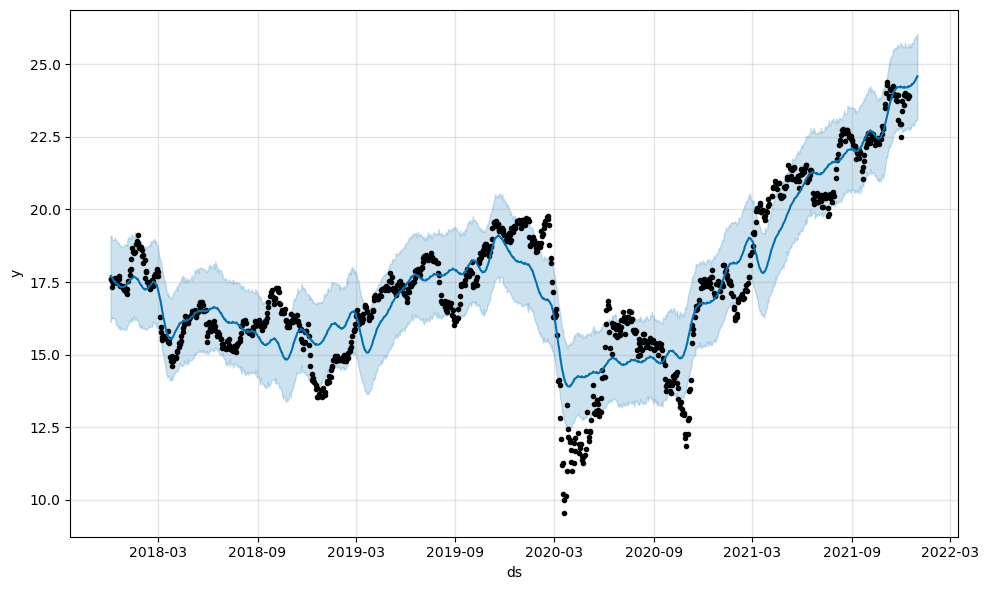

In [298]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=16)
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

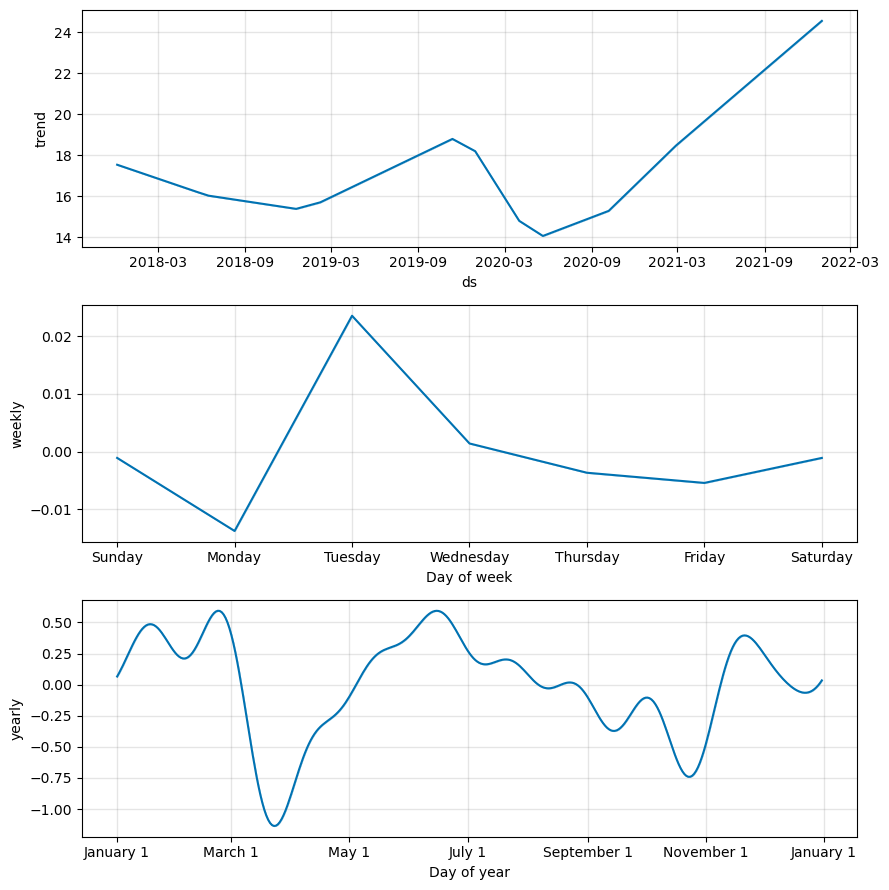

In [299]:
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);

In [300]:
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 0.3039785821431498
The MAPE for the baseline model is 0.01279160590120093


In [301]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model_season.fit(train)

16:01:43 - cmdstanpy - INFO - Chain [1] start processing
16:01:43 - cmdstanpy - INFO - Chain [1] done processing


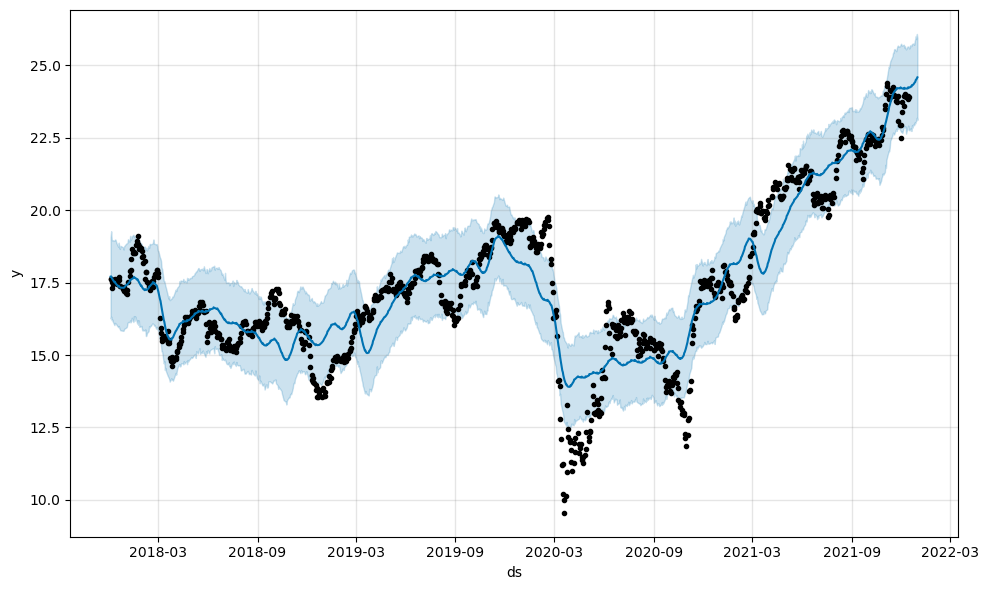

In [302]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=16)
# Make prediction
forecast_season = model_season.predict(future_season)
# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

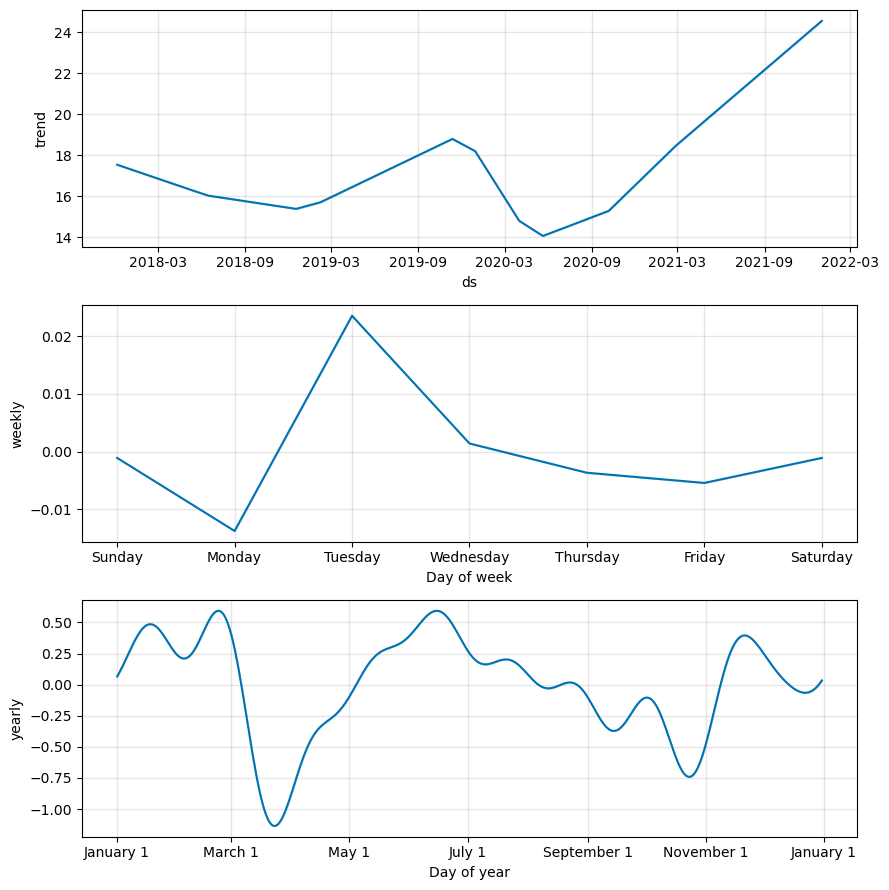

In [303]:
# Visualize the forecast components
model_season.plot_components(forecast_season);

In [304]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')
# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')

The MAE for the seasonality model is 0.3039785821431498
The MAPE for the seasonality model is 0.01279160590120093


In [305]:
# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Add regressor
model_multivariate.add_regressor('CAC 40', standardize=False)
# Fit the model on the training dataset
model_multivariate.fit(train)

16:01:43 - cmdstanpy - INFO - Chain [1] start processing
16:01:44 - cmdstanpy - INFO - Chain [1] done processing


In [306]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=16)
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data[['ds', 'CAC 40']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)

,ds,CAC 40
1034,2021-12-20,6870.100098
1035,2021-12-21,6964.990234
1036,2021-12-22,7051.669922
1037,2021-12-23,7106.149902
1038,2021-12-24,7086.580078
1039,2021-12-27,7140.390137
1040,2021-12-28,7181.109863
1041,2021-12-29,7161.520020
1042,2021-12-30,7173.229980
1043,2021-12-31,7153.029785


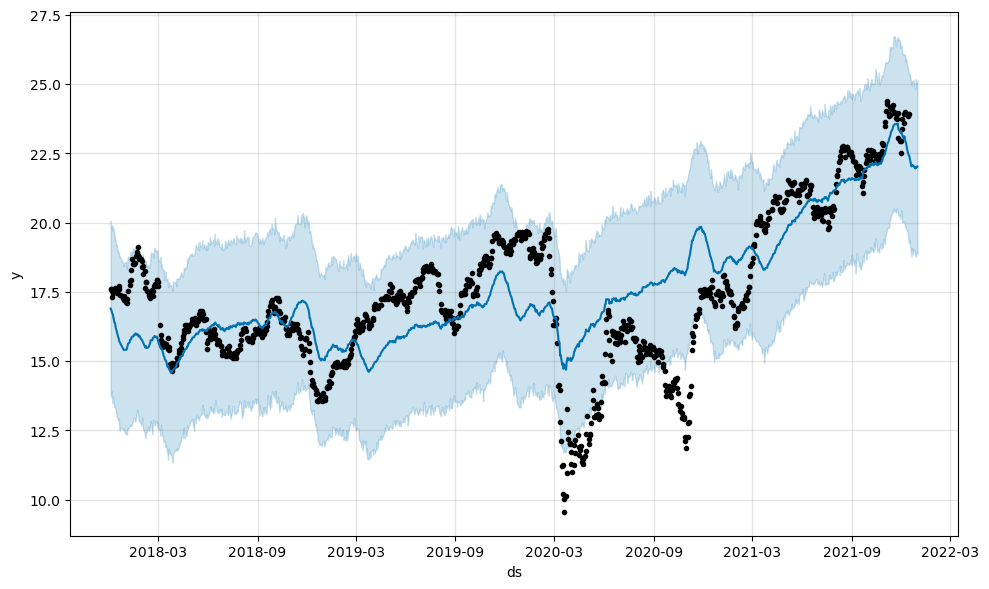

In [307]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

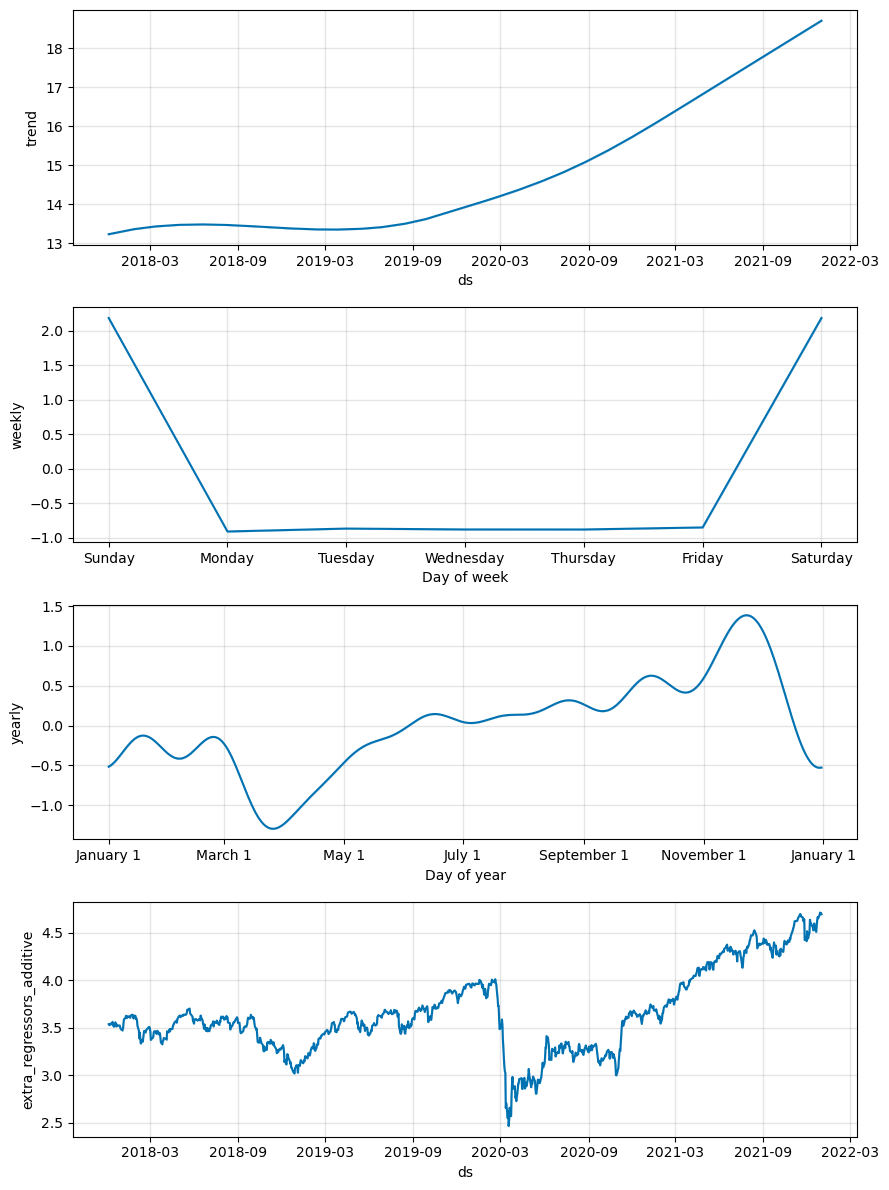

In [308]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [309]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')
# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 2.032211975117873
The MAPE for the multivariate model is 0.08401423601504239


In [310]:
# COVID time window
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,    
})
# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07']),
    'lower_window': -7,
    'upper_window': 1,    
})
# Combine all events
events = pd.concat((COVID, superbowl))
# Take a look at the events data
events


,holiday,ds,lower_window,upper_window
0,COVID,2020-03-15,-15,15
0,superbowl,2020-02-02,-7,1
1,superbowl,2021-02-07,-7,1


In [311]:
# Add holidays
model_holiday = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)
# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='FR')
# Add regressor
model_holiday.add_regressor('CAC 40', standardize=False)
# Fit the model on the training dataset
model_holiday.fit(train)
# All the holidays and events
model_holiday.train_holiday_names

16:01:44 - cmdstanpy - INFO - Chain [1] start processing
16:01:45 - cmdstanpy - INFO - Chain [1] done processing


0                  COVID
1              superbowl
2           Jour de l'an
3        Fête du Travail
4         Armistice 1945
5         Fête nationale
6         Armistice 1918
7        Lundi de Pâques
8     Lundi de Pentecôte
9              Ascension
10            Assomption
11             Toussaint
12                  Noël
dtype: object

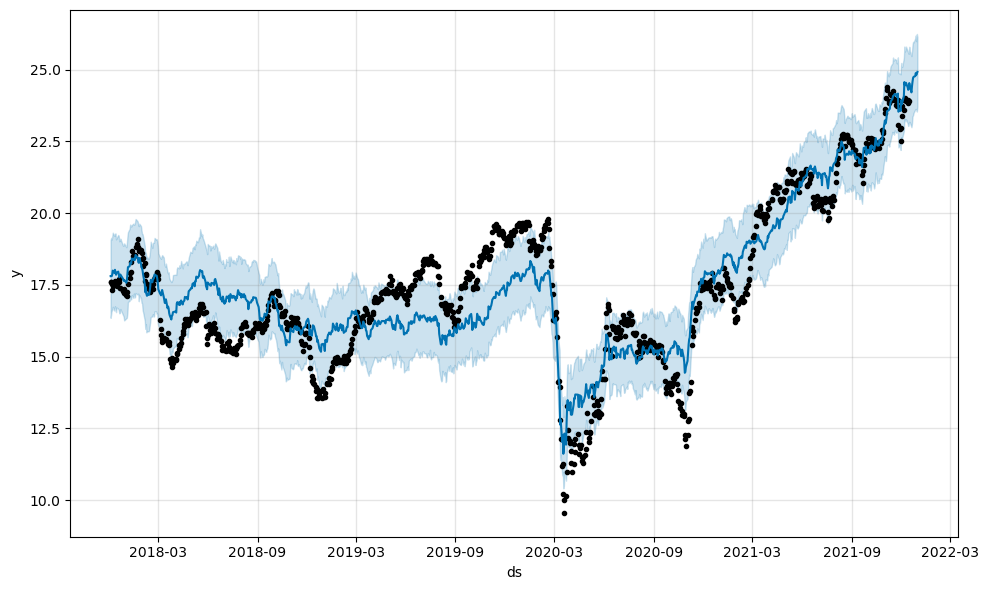

In [312]:
# Create the time range for the forecast
future_holiday = model_holiday.make_future_dataframe(periods=16)
# Append the regressor values
future_holiday = pd.merge(future_holiday, data[['ds', 'CAC 40']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday = model_holiday.predict(future_holiday)
# Visualize the forecast
model_holiday.plot(forecast_holiday); # Add semi-colon to remove the duplicated chart

In [313]:
# Merge actual and predicted values
performance_holiday = pd.merge(test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the holiday/event model is {performance_holiday_MAE}')
# Check MAPE value
performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the holiday/event model is {performance_holiday_MAPE}')

The MAE for the holiday/event model is 0.5444449287673262
The MAPE for the holiday/event model is 0.02272963615157822


In [314]:
# Check correlation
data.corrwith(data["y"])

y         1.000000
CAC 40    0.928047
dtype: float64